In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import manifold,neighbors
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, fcluster,distance  
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_pickle("/home/serge/development/fastai-genomic/data/Bacillus-10mer-500-0-06292019.pkl")

In [19]:
df.shape

(21392, 105)

In [ ]:
data = df.iloc[:,0:100].values
out = np.asarray(data)

In [87]:
#export
from sklearn.decomposition import TruncatedSVD

def denoise(data):
    svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
    svd.fit(data)
    pc = svd.components_
    data -= data.dot(pc.T) * pc
    return data

In [88]:
!python notebook2script.py "denoiser.ipynb"

../exp/nb_denoiser.py
Converted denoiser.ipynb to ../exp/nb_denoiser.py


In [ ]:
d = denoise(out)

In [29]:
d = MinMaxScaler().fit_transform(out)
o = MinMaxScaler().fit_transform(data)

In [15]:
d = out
o = df.values

### Build phylogenetic tree

#### Denoised

In [49]:
linked = linkage(d[:1000,:], metric="cosine")
labels = df.name[:1000]

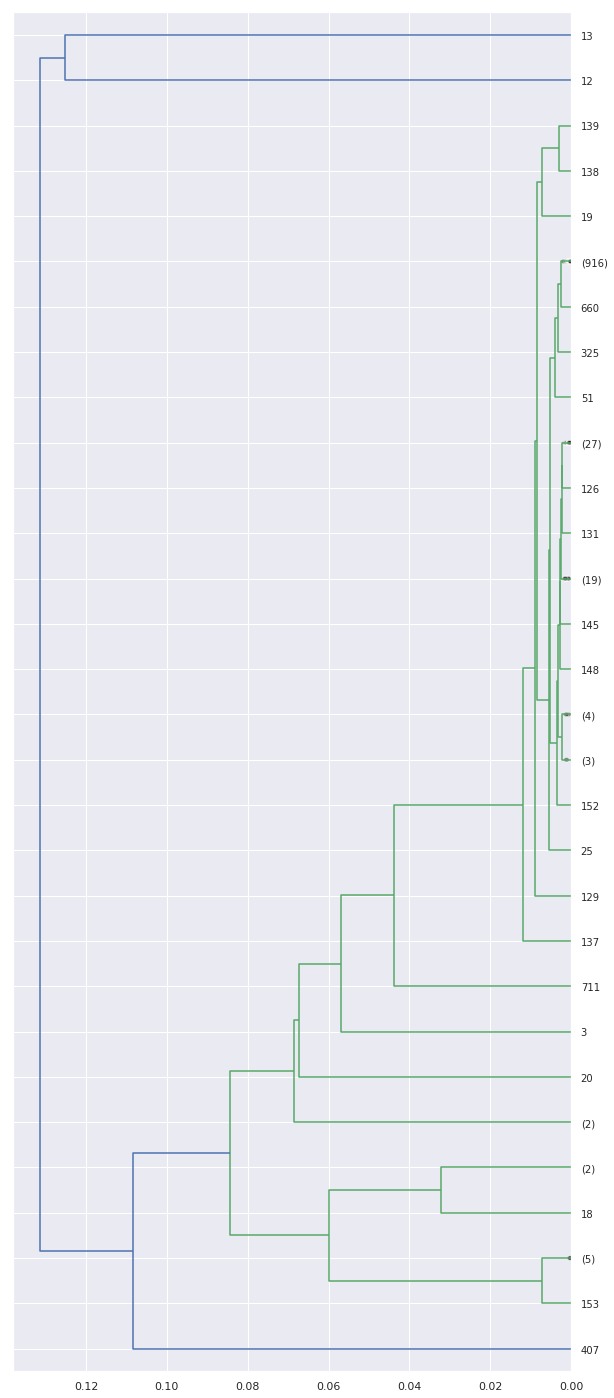

In [57]:
fig=plt.figure(figsize=(10, 25)) 
ax1 = fig.add_subplot(111)
htree = dendrogram(linked,  
            ax=ax1,
            orientation='left',
            p=30,
            truncate_mode='lastp',
            leaf_font_size = 10,
#              labels=labels,
            distance_sort='descending',
            show_contracted=True,       
            show_leaf_counts=True
        )

#### Raw

In [58]:
linked = linkage(o[:1000,:], metric="cosine")
labels = df.name[:1000]

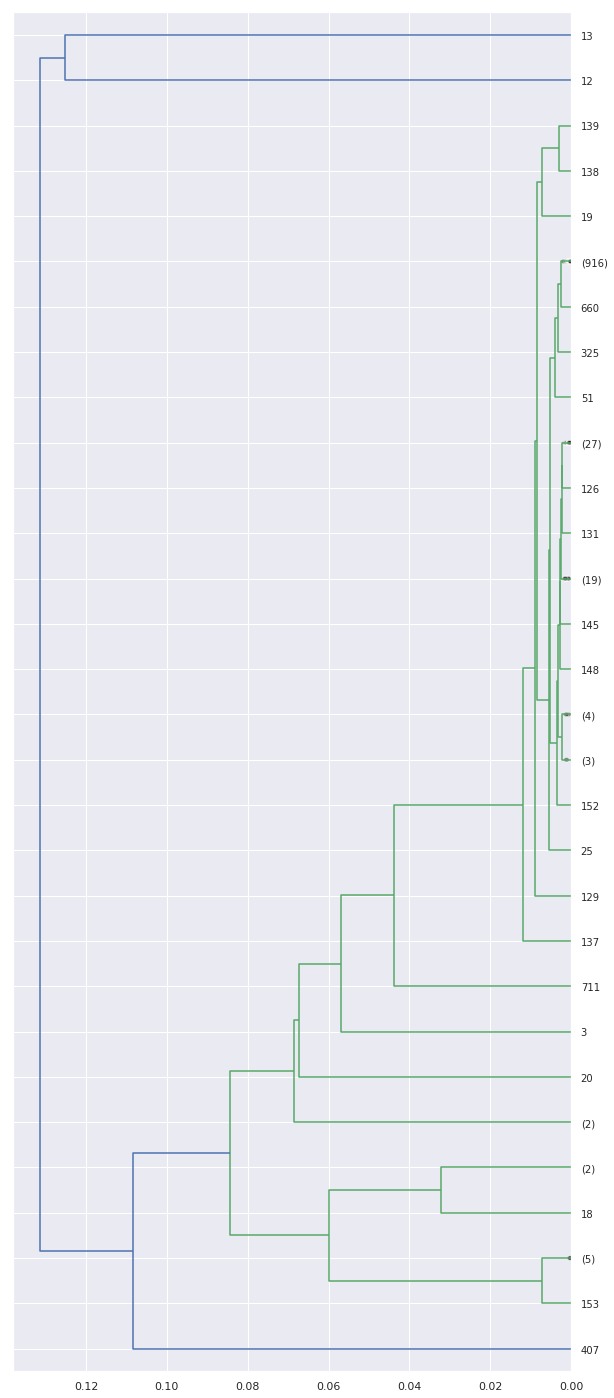

In [59]:
fig=plt.figure(figsize=(10, 25)) 
ax1 = fig.add_subplot(111)
htree = dendrogram(linked,  
            ax=ax1,
            orientation='left',
            p=30,
            truncate_mode='lastp',
            leaf_font_size = 10,
#              labels=labels,
            distance_sort='descending',
            show_contracted=True,       
            show_leaf_counts=True
        )

### Reduce dimensions and plot

In [6]:
import sys, os
sys.path.append(".")
from KlsAutoencoder import *
e = Encoder("../data/models/encoder-3d",[100,50,3]);e

In [7]:
d = e.transform(d)
o = e.transform(o)

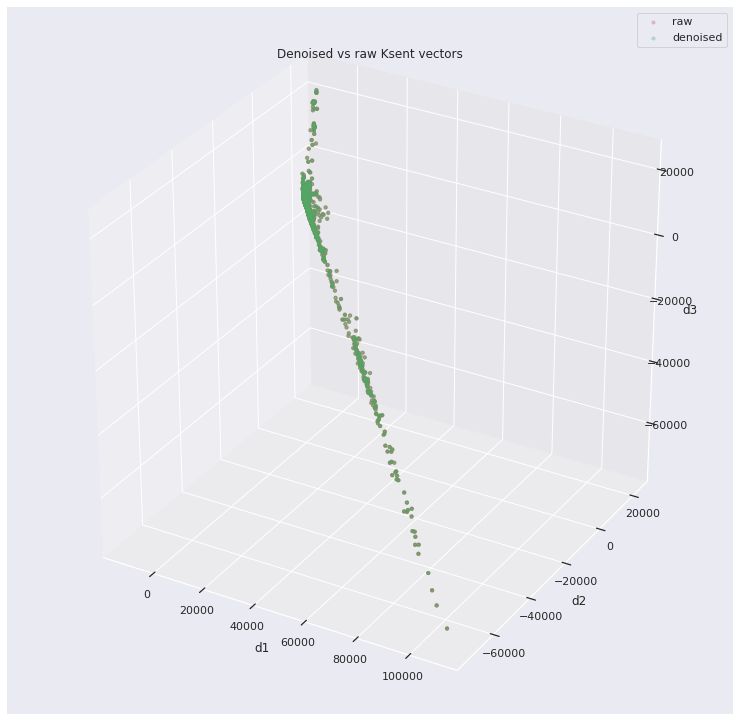

In [12]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(o[:,1],o[:,2],o[:,2], marker="o",s=10,color='r', alpha=0.25, label = "raw")
ax.scatter(d[:,1],d[:,2],d[:,2], marker="o",s=10,color='g', alpha=0.25, label = "denoised")
ax.set_xlabel('d1')
ax.set_ylabel('d2')
ax.set_zlabel('d3')
ax.set_title("Denoised vs raw Ksent vectors")
plt.legend()
plt.show()